ETH 24 mo Simluation
==============

This python notebook simulates the ARTH price given ethereum's price from Mar 2019 - Mar 2022

---

## Simluation Results

Below we simulate the simple indicator with a starting index of 2 and taking in Bitcoin's daily price from Oct 2020 to Feb 2022 (Roughly 12 months of data). We make the following observations from the graphs below

- The indicator succesfully appreciates in a bull market but remains stable in a bear market.
- The indicator ends at a value of 2.34 which is roughly a 50% appreciation over 12 months
- During this period, the CPI appreciated by roughly 33%, which means that ARTH could've not only protected its users from inflation but also yielded an extra 17%

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import indicator
%matplotlib inline

# fetch the last few prices of bitcoin
data = pd.read_csv('data/eth_price.csv')

# The dampening factor determines how much we will appreciate ARTH by based on the 
# growth of ETH & BTC. In this case it is roughly 10%
DAMPENING_FACTOR = 0.1

MOVING_AVERAGE_LONG_DURATION = 30
MOVING_AVERAGE_SHORT_DURATION = 7

data

,date,close,volume,open,high,low
0,03/08/2019,133.85,NaN,136.93,139.45,131.66
1,03/09/2019,137.52,NaN,133.85,138.57,133.38
2,03/10/2019,135.72,NaN,137.52,137.75,134.53
3,03/11/2019,133.42,NaN,136.10,136.23,131.66
4,03/12/2019,133.80,NaN,132.99,134.93,129.14
...,...,...,...,...,...,...
1140,06/29/2022,1092.25,NaN,1145.24,1105.88,1078.39
1141,06/30/2022,1065.10,NaN,1094.02,1110.25,1050.95
1142,07/01/2022,1038.52,NaN,1056.78,1068.14,1035.08
1143,07/02/2022,1063.18,NaN,1038.14,1070.87,1055.49


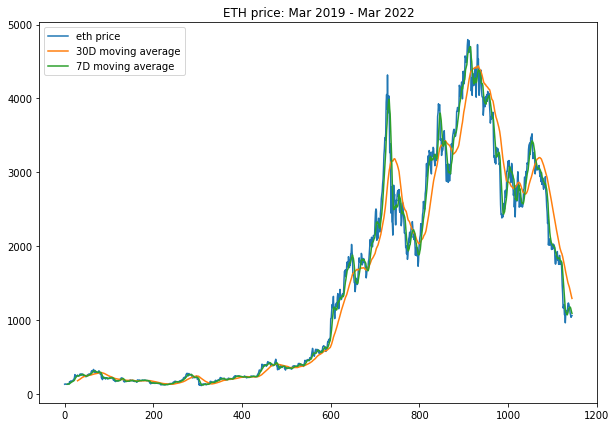

In [25]:
data['30d_ma'] = data['close'].rolling(MOVING_AVERAGE_LONG_DURATION).mean()
data['7d_ma'] = data['close'].rolling(MOVING_AVERAGE_SHORT_DURATION).mean()

plt.figure(figsize=(10, 7))

plt.plot(data['close'])
plt.plot(data['30d_ma'])
plt.plot(data['7d_ma'])

plt.legend(['eth price', '30D moving average', '7D moving average'])
plt.title("ETH price: Mar 2019 - Mar 2022")
plt.show()

Text(0.5, 1.0, 'slope of 30d & 7d moving averages')

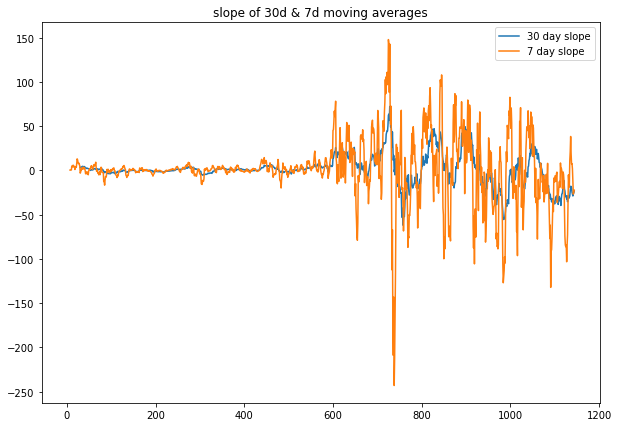

In [26]:
# calculate the slope of each pt/day
def get_slope_trend (_data):
  dailyPriceDelta = [0]
  for i in range(len(data.index)):
    if i!= 0:
      diff = (data.loc[i, _data] - data.loc[i - 1, _data])
      dailyPriceDelta.append(diff)
  return dailyPriceDelta  

data['slope_30d'] = get_slope_trend('30d_ma')
data['slope_7d'] = get_slope_trend('7d_ma')

plt.figure(figsize=(10, 7))
plt.plot(data['slope_30d'])
plt.plot(data['slope_7d'])

plt.legend(['30 day slope', '7 day slope'])
plt.title("slope of 30d & 7d moving averages")

From the above chart we can see that the 30 day moving average fluctuates a lot lesser than then 7 day moving average.

In [27]:
# calculate the arth price
price30d = np.array(data['30d_ma'])
price7d = np.array(data['7d_ma'])
data['trend'] = indicator.arth_indicator(price30d, price7d, 2, MOVING_AVERAGE_LONG_DURATION)

data[MOVING_AVERAGE_LONG_DURATION:]

,date,close,volume,open,high,low,30d_ma,7d_ma,slope_30d,slope_7d,trend
30,05/22/2019,243.03,NaN,254.98,245.09,241.84,184.195000,248.055714,3.639333,-2.995714,2.000000
31,05/23/2019,242.45,NaN,244.46,246.15,242.45,187.692667,246.438571,3.497667,-1.617143,2.000000
32,05/24/2019,250.48,NaN,241.99,251.08,247.90,191.518000,247.912857,3.825333,1.474286,2.004076
33,05/25/2019,250.72,NaN,251.34,251.55,250.24,195.428000,248.752857,3.910000,0.840000,2.008168
34,05/26/2019,264.37,NaN,249.71,269.27,264.11,199.780333,251.095714,4.352333,2.342857,2.012640
...,...,...,...,...,...,...,...,...,...,...,...
1140,06/29/2022,1092.25,NaN,1145.24,1105.88,1078.39,1397.630667,1177.434286,-26.737667,1.887143,3.055833
1141,06/30/2022,1065.10,NaN,1094.02,1110.25,1050.95,1368.841000,1165.304286,-28.789667,-12.130000,3.055833
1142,07/01/2022,1038.52,NaN,1056.78,1068.14,1035.08,1343.088667,1138.594286,-25.752333,-26.710000,3.055833
1143,07/02/2022,1063.18,NaN,1038.14,1070.87,1055.49,1317.564000,1114.322857,-25.524667,-24.271429,3.055833


With the above algorithim, we feed in the 30-day and 7-day moving averages and come up with the final trendline which starts at 2 and ends at 3.05 which is roughly a 50% increase from the very beginning.

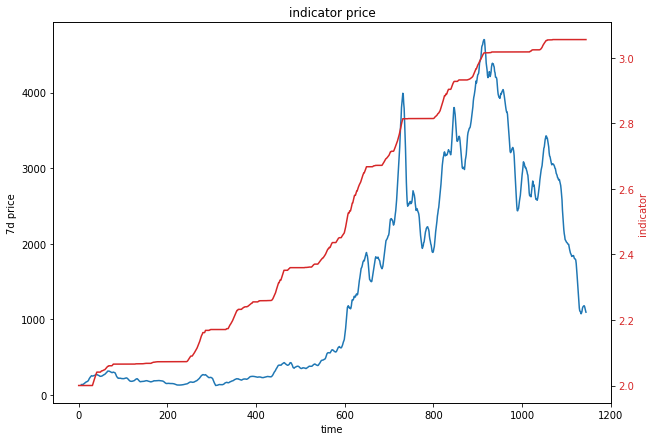

In [28]:
# Plot the data
fig, ax1 = plt.subplots()

plt.title("indicator price")
fig.set_figwidth(10)
fig.set_figheight(7)

color = 'tab:blue'
ax1.set_xlabel('time')
ax1.set_ylabel('7d price')
ax1.plot(data['7d_ma'])
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('indicator', color=color)
ax2.plot(data['trend'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [29]:
df = pd.DataFrame()
df['date'] = data['date']
df['price'] = data['close']
df['7d moving average'] = data['7d_ma']
df['30d moving average'] = data['30d_ma']
df['indicator'] = data['trend']

df[MOVING_AVERAGE_LONG_DURATION:]


,date,price,7d moving average,30d moving average,indicator
30,05/22/2019,243.03,248.055714,184.195000,2.000000
31,05/23/2019,242.45,246.438571,187.692667,2.000000
32,05/24/2019,250.48,247.912857,191.518000,2.004076
33,05/25/2019,250.72,248.752857,195.428000,2.008168
34,05/26/2019,264.37,251.095714,199.780333,2.012640
...,...,...,...,...,...
1140,06/29/2022,1092.25,1177.434286,1397.630667,3.055833
1141,06/30/2022,1065.10,1165.304286,1368.841000,3.055833
1142,07/01/2022,1038.52,1138.594286,1343.088667,3.055833
1143,07/02/2022,1063.18,1114.322857,1317.564000,3.055833
